In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\jinil\Desktop\Energy Consumption prediction\Energy_consumption_dataset.csv")
df

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,Sunday,Yes,26.338718,52.580000,1563.567259,7,On,On,20.591717,70.270344
4996,12,17,Monday,No,20.007565,42.765607,1999.982252,5,Off,On,7.536319,73.943071
4997,12,13,Thursday,Yes,26.226253,30.015975,1999.982252,5,Off,On,28.162193,85.784613
4998,12,8,Saturday,Yes,24.673206,50.223939,1240.811298,2,On,On,20.918483,63.784001


In [3]:
# WE will use this data to test our model during deployment

sample_df = df.sample(n=1000, random_state=42)
sample_df.to_csv('test_data_sample.csv', index=False)
print("Sample data saved as 'test_data_sample.csv'")

Sample data saved as 'test_data_sample.csv'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [5]:
df.describe()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.588687,6.888306,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,6.000000,11.000000,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,9.000000,18.000000,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64

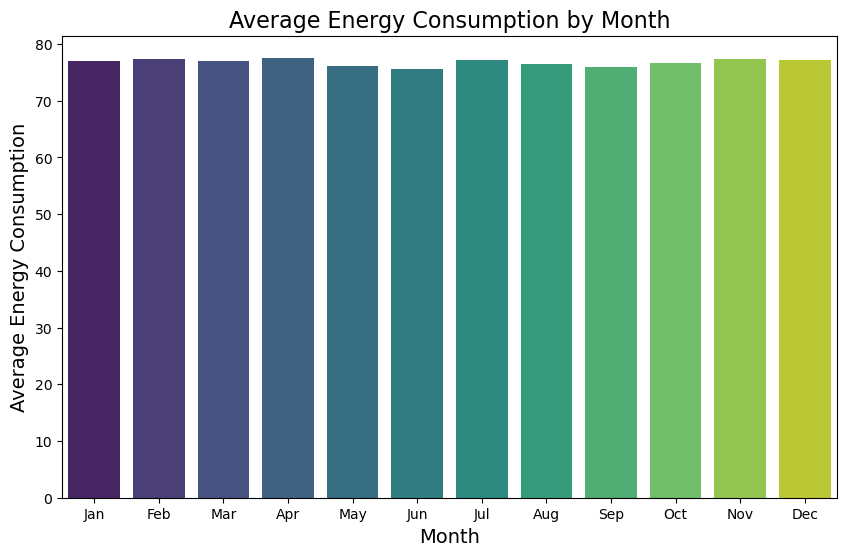

In [8]:
monthly_avg_consumption = df.groupby('Month')['EnergyConsumption'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='EnergyConsumption', data=monthly_avg_consumption, palette='viridis')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


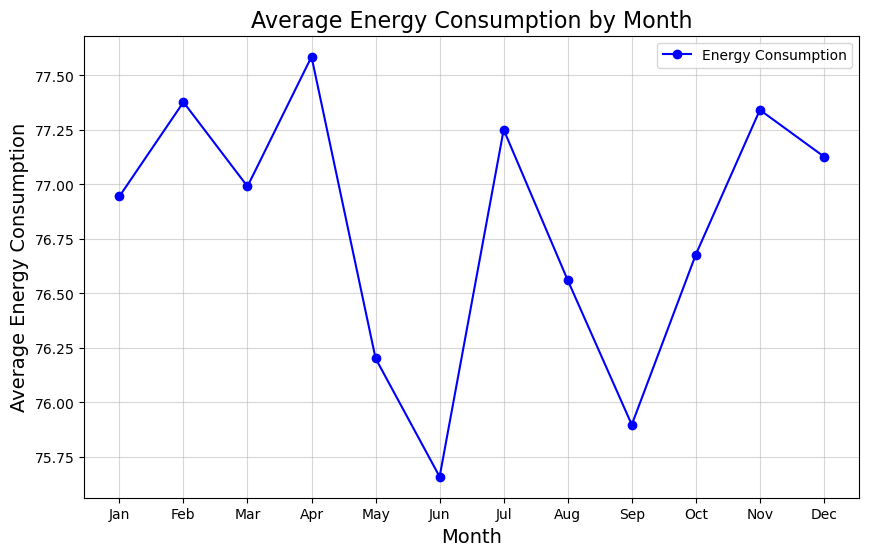

In [9]:
monthly_avg_consumption = df.groupby('Month')['EnergyConsumption'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_consumption['Month'], 
         monthly_avg_consumption['EnergyConsumption'], 
         marker='o', color='b', label='Energy Consumption')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.legend()
plt.show()

 The **Average Energy Consumption** values are relatively stable across months, ranging between **75** and **79** throughout the year. This indicates that there isn't a significant variation in energy consumption based solely on the month. 

Therefore, creating **dummy variables** for the **Month** column may not add much predictive value for our model. Instead, we can either:
1. **Drop the Month column** entirely to reduce complexity.
2. **Create a new column, "Season"**, to capture potential patterns that could exist seasonally, while grouping months with similar characteristics. This way, we don't lose valuable insights that could come from understanding how energy consumption may vary by season

In [10]:
def get_season(month):
    if month in [3, 4, 5]:  # Summer: Mar, Apr, May
        return 'Summer'
    elif month in [6, 7, 8]:  # Monsoon: Jun, Jul, Aug
        return 'Monsoon'
    elif month in [9, 10, 11]:  # Autumn: Sep, Oct, Nov
        return 'Autumn'
    else:  # Winter: Dec, Jan, Feb
        return 'Winter'
df['Season'] = df['Month'].apply(get_season)
df = df.drop('Month', axis=1)
columns = ['Season'] + [col for col in df.columns if col != 'Season']
df = df[columns]


In [11]:
df['Season'].unique()

array(['Winter', 'Summer', 'Monsoon', 'Autumn'], dtype=object)

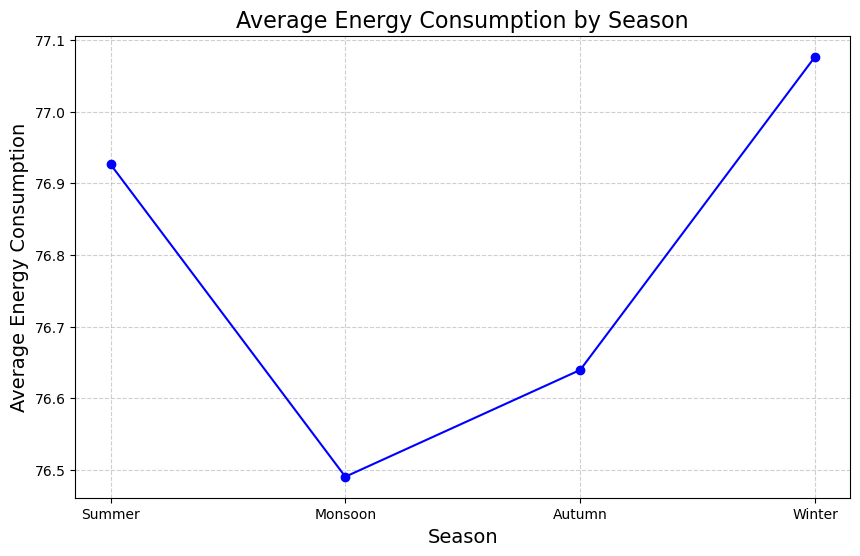

In [12]:
season_avg_consumption = df.groupby('Season')['EnergyConsumption'].mean().reset_index()

# Define the order of seasons
season_order = ['Summer', 'Monsoon', 'Autumn', 'Winter']
season_avg_consumption['Season'] = pd.Categorical(season_avg_consumption['Season'], categories=season_order, ordered=True)
season_avg_consumption = season_avg_consumption.sort_values('Season')

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(season_avg_consumption['Season'], season_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='b')
plt.title('Average Energy Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

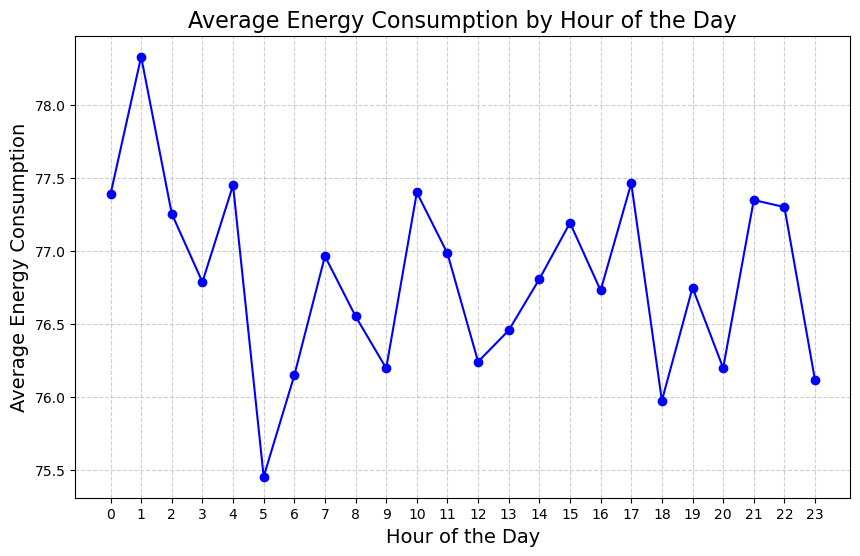

In [13]:
hour_avg_consumption = df.groupby('Hour')['EnergyConsumption'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(hour_avg_consumption['Hour'], hour_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='b')
plt.title('Average Energy Consumption by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(range(0, 24))  # Hour range from 0 to 23
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

While there are some variations in **Energy Consumption** throughout the day, the consumption values remain within a narrow range of **75 to 79**. This suggests that energy consumption does not significantly vary with each individual hour.

If we were to create **dummy variables** for every single hour of the day (0 to 23), it would significantly increase the dimensionality of our data, leading to a **more complex model** and potentially causing issues like overfitting.

To simplify the model and capture the time-of-day effect without unnecessary complexity, we can categorize the hours into broader time periods that are likely to exhibit similar energy consumption behavior:
- **Morning**: 6 AM to 12 PM
- **Afternoon**: 12 PM to 6 PM
- **Evening**: 6 PM to 9 PM
- **Night**: 9 PM to 6 AM

By grouping the hours into these four parts of the day, we reduce the number of features, decrease the model's complexity, and still preserve meaningful insights into how energy consumption behaves across different times of the day.


In [14]:
def get_time_of_day(hour):
    if 4 <= hour < 12:  
        return 'Morning'
    elif 12 <= hour < 16:  
        return 'Afternoon'
    elif 16 <= hour < 21:  
        return 'Evening'
    else:  
        return 'Night'
df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)
df = df.drop('Hour', axis=1)
columns = ['Season', 'TimeOfDay'] + [col for col in df.columns if col not in ['Season', 'TimeOfDay']]
df = df[columns]


In [15]:
df['TimeOfDay'].unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

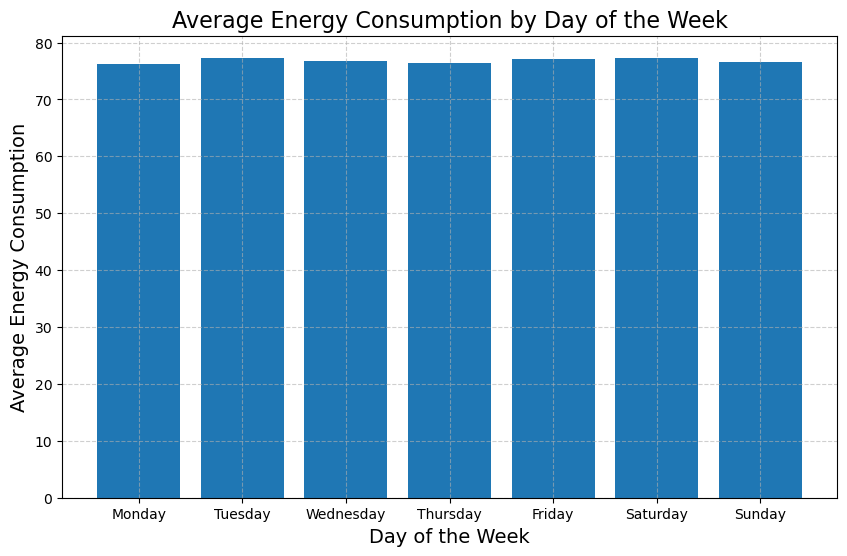

In [16]:
dayofweek_avg_consumption = df.groupby('DayOfWeek')['EnergyConsumption'].mean().reset_index()

# Sort the days of the week to ensure correct order
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_avg_consumption['DayOfWeek'] = pd.Categorical(dayofweek_avg_consumption['DayOfWeek'], categories=dayofweek_order, ordered=True)
dayofweek_avg_consumption = dayofweek_avg_consumption.sort_values('DayOfWeek')

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(dayofweek_avg_consumption['DayOfWeek'], dayofweek_avg_consumption['EnergyConsumption'])
plt.title('Average Energy Consumption by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

The plot shows the **Average Energy Consumption** by **DayOfWeek**, and it remains relatively stable throughout the week. The energy consumption patterns do not exhibit significant variation based on the day of the week. 

The only potential change in energy consumption would likely occur during **holidays**, which are captured by the **Holiday** column in our dataset. Since we already have a separate **Holiday** column to track changes in energy consumption during holidays, the **DayOfWeek** column does not add meaningful information to our analysis.

Therefore, it is more efficient to **drop the DayOfWeek column** to reduce dimensionality and keep only the relevant features that affect the model’s performance. This helps to avoid unnecessary complexity and potential overfitting.


In [17]:
df.drop('DayOfWeek', axis=1, inplace=True)


In [18]:
df

,Season,TimeOfDay,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,Winter,Night,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,Winter,Night,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,Winter,Night,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,Winter,Night,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,Winter,Morning,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
4995,Winter,Morning,Yes,26.338718,52.580000,1563.567259,7,On,On,20.591717,70.270344
4996,Winter,Evening,No,20.007565,42.765607,1999.982252,5,Off,On,7.536319,73.943071
4997,Winter,Afternoon,Yes,26.226253,30.015975,1999.982252,5,Off,On,28.162193,85.784613
4998,Winter,Morning,Yes,24.673206,50.223939,1240.811298,2,On,On,20.918483,63.784001


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             5000 non-null   object 
 1   TimeOfDay          5000 non-null   object 
 2   Holiday            5000 non-null   object 
 3   Temperature        5000 non-null   float64
 4   Humidity           5000 non-null   float64
 5   SquareFootage      5000 non-null   float64
 6   Occupancy          5000 non-null   int64  
 7   HVACUsage          5000 non-null   object 
 8   LightingUsage      5000 non-null   object 
 9   RenewableEnergy    5000 non-null   float64
 10  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 429.8+ KB


In [20]:
categorical_features = ['Season', 'TimeOfDay', 'Holiday', 'HVACUsage', 'LightingUsage']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,Season_Monsoon,Season_Summer,Season_Winter,TimeOfDay_Evening,TimeOfDay_Morning,TimeOfDay_Night,Holiday_Yes,HVACUsage_On,LightingUsage_On
0,25.139433,43.431581,1565.693999,5,2.774699,75.364373,False,False,True,False,False,True,False,True,False
1,27.731651,54.225919,1411.064918,1,21.831384,83.401855,False,False,True,False,False,True,False,True,True
2,28.704277,58.907658,1755.715009,2,6.764672,78.270888,False,False,True,False,False,True,False,False,False
3,20.080469,50.371637,1452.316318,1,8.623447,56.519850,False,False,True,False,False,True,False,False,True
4,23.097359,51.401421,1094.130359,9,3.071969,70.811732,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,26.338718,52.580000,1563.567259,7,20.591717,70.270344,False,False,True,False,True,False,True,True,True
4996,20.007565,42.765607,1999.982252,5,7.536319,73.943071,False,False,True,True,False,False,False,False,True
4997,26.226253,30.015975,1999.982252,5,28.162193,85.784613,False,False,True,False,False,False,True,False,True
4998,24.673206,50.223939,1240.811298,2,20.918483,63.784001,False,False,True,False,True,False,True,True,True


In [21]:
X = df.drop(columns=['EnergyConsumption'])
y = df['EnergyConsumption']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [23]:
X_train.shape

(4000, 14)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("scaler saved successfully")

scaler saved successfully


In [26]:
X_train_scaled

array([[0.38356624, 0.16583629, 0.78710351, ..., 1.        , 0.        ,
        1.        ],
       [0.03026714, 0.67376719, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.05697615, 0.34603388, 0.39311902, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.87394221, 0.35380599, 0.58082363, ..., 0.        , 1.        ,
        1.        ],
       [0.60222829, 1.        , 0.88663545, ..., 1.        , 1.        ,
        1.        ],
       [0.31837734, 0.96334379, 0.8799872 , ..., 0.        , 1.        ,
        0.        ]])

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [28]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 14))
model.add(Dropout(0.01))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))



In [29]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import Huber
model.compile(optimizer=RMSprop(learning_rate=0.001),  
              loss=Huber(),
              metrics=['mae'])


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train_scaled, y_train,
                    validation_data= (X_test_scaled, y_test),
                    epochs = 30,
                    batch_size=32,  
                    verbose=1)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 75.7567 - mae: 76.2567 - val_loss: 71.0195 - val_mae: 71.5195
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 67.2073 - mae: 67.7073 - val_loss: 48.9483 - val_mae: 49.4483
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38.5315 - mae: 39.0307 - val_loss: 11.0391 - val_mae: 11.5320
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11.0913 - mae: 11.5830 - val_loss: 10.0506 - val_mae: 10.5393
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.8729 - mae: 10.3612 - val_loss: 9.3325 - val_mae: 9.8229
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6372 - mae: 10.1259 - val_loss: 8.8668 - val_mae: 9.3537
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.0071 - mae: 9.4961 - val_loss: 8.4630 - val_mae: 8.9482
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7538 - mae: 9.2432 - val_loss: 8.1560 - val_mae: 8.6407
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━

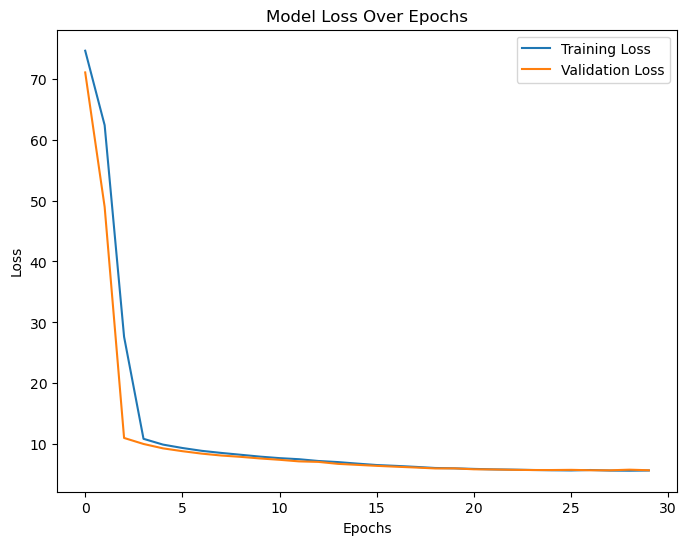

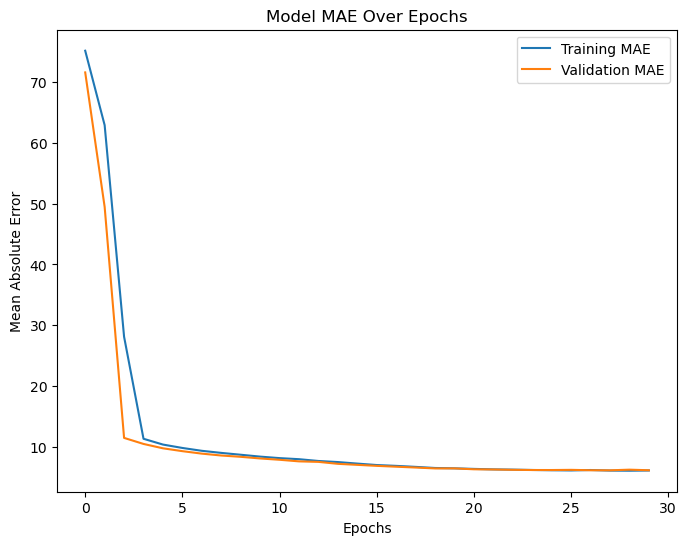

In [32]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(8, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


In [33]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9098 - mae: 6.3964
Test Loss: 5.738009452819824
Test MAE: 6.22122049331665


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step 


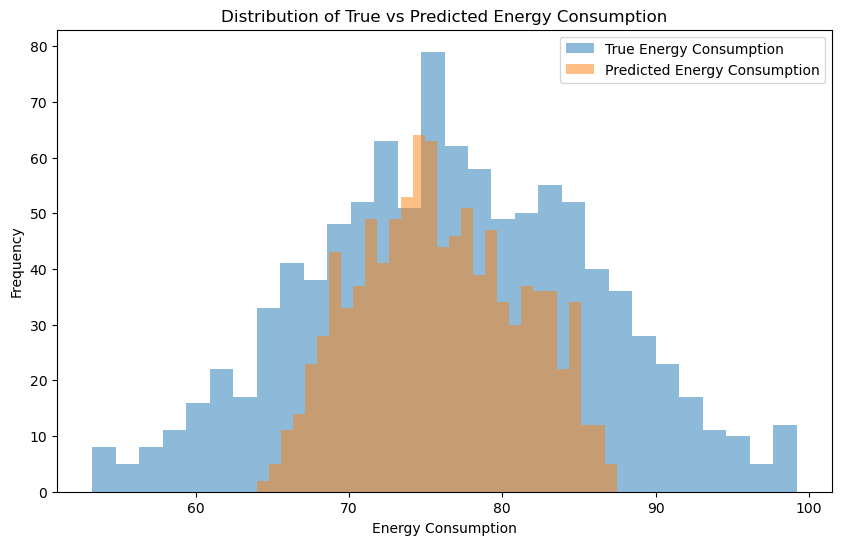

In [34]:
y_pred = model.predict(X_test_scaled)

# Plot histograms of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='True Energy Consumption')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of True vs Predicted Energy Consumption')
plt.legend(loc='upper right')
plt.show()

In [35]:
rmse = np.sqrt(test_loss)
print(f"RMSE: {rmse}")


RMSE: 2.395414254950451


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Display the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')


Mean Absolute Error (MAE): 6.221220012514033
Mean Squared Error (MSE): 61.51012959286619
Root Mean Squared Error (RMSE): 7.842839383339824
R² Score: 0.29169826210732763
Explained Variance Score: 0.2979092349202509


In [37]:
model.save('model.keras')
